In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

In [3]:
#1

In [4]:
df = pd.read_csv('games.csv')
df.drop(['Rank'], axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [7]:
df[df.isnull()] #No data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df = df.dropna() #cleaning a data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [10]:
# 2

/Users/nikolaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


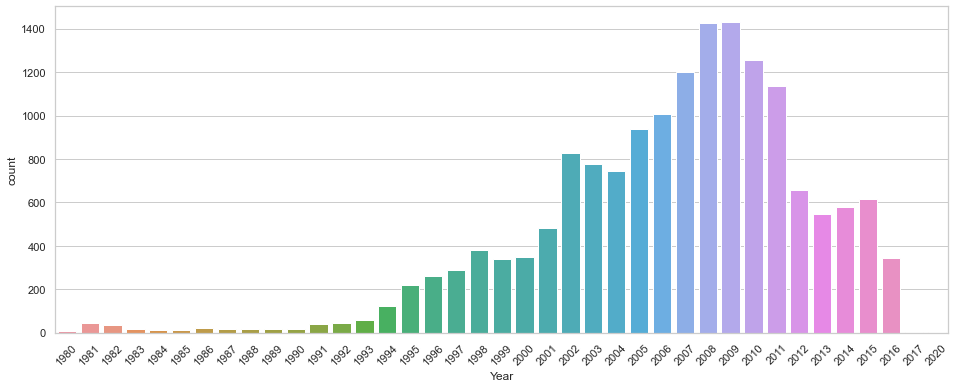

In [11]:
df.Year = df.Year.astype('int')

sns.countplot(df.Year, x='Year')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Filter by year and divide by the total number of rows to estimate fractions of the whole

df.query("Year > 2007").shape[0]/df.shape[0]

0.4906390031305629

In [13]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [14]:
ss.mode(df.Year)

ModeResult(mode=2009, count=1431)

In [15]:
#3

In [16]:
df.Platform.unique().tolist()

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 '3DS',
 'PS4',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'GC',
 'WiiU',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

In [17]:
df.groupby('Platform', as_index=True).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

,Platform,Count
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234
19,PSP,1197
15,PS,1189
13,PC,938
29,XB,803
6,GBA,786


In [18]:
#Процентное распределение

normalist_platform = df.Platform.value_counts(normalize=True).mul(100).round(2).reset_index(name='Count').sort_values(by='Count', ascending=False)
normalist_platform

,index,Count
0,DS,13.08
1,PS2,13.06
2,PS3,8.00
3,Wii,7.92
4,X360,7.57
5,PSP,7.35
6,PS,7.30
7,PC,5.76
8,XB,4.93
9,GBA,4.82


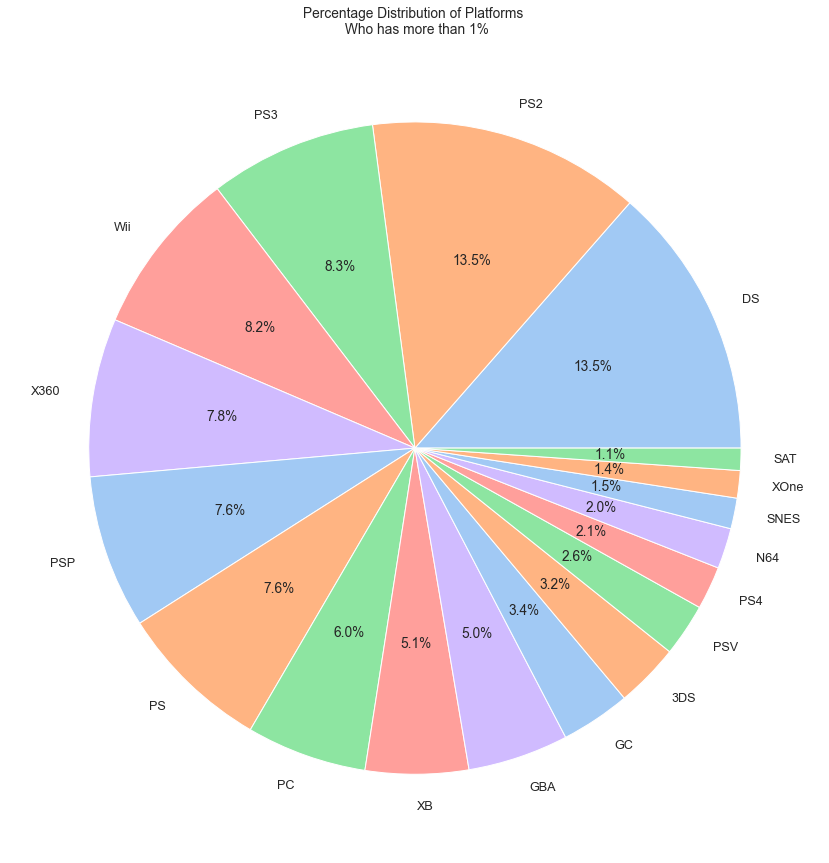

In [19]:
normalist_platform = normalist_platform.query("Count >= 1")

sns.set(font_scale=1.15)
plt.figure(figsize=(15, 15))

colors = sns.color_palette('pastel')[0:5]
plt.pie(normalist_platform['Count'], labels=normalist_platform['index'], colors=colors, autopct='%.1f%%')

plt.title('Percentage Distribution of Platforms \n Who has more than 1%')
plt.show()

In [20]:
#4

In [21]:
df.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [22]:
df.Publisher.mode()

0    Electronic Arts
Name: Publisher, dtype: object

In [23]:
#5

In [24]:
nitetendo = df.query("Publisher == 'Nintendo'")
nitetendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].median() 

#This is NA

NA_Sales       0.375
EU_Sales       0.120
JP_Sales       0.280
Other_Sales    0.030
dtype: float64

In [25]:
#6

In [26]:
nitetendo_JP = nitetendo.groupby('Genre')['JP_Sales']
nitetendo_JP.size()

Genre
Action           78
Adventure        35
Fighting         18
Misc            100
Platform        111
Puzzle           74
Racing           37
Role-Playing    105
Shooter          24
Simulation       28
Sports           55
Strategy         31
Name: JP_Sales, dtype: int64

In [27]:
nitetendo_JP.agg(['median', 'mean', lambda x: x.quantile(0.75) - x.quantile(0.25)])

,median,mean,<lambda_0>
Genre,,,
Action,0.170,0.373846,0.3800
Adventure,0.090,0.257429,0.2000
Fighting,0.500,0.830000,1.2325
Misc,0.250,0.552500,0.6800
Platform,0.540,0.922162,0.8550
Puzzle,0.255,0.501216,0.5225
Racing,0.340,0.789730,0.7900
Role-Playing,0.360,0.970952,0.5800
Shooter,0.130,0.251250,0.2050


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

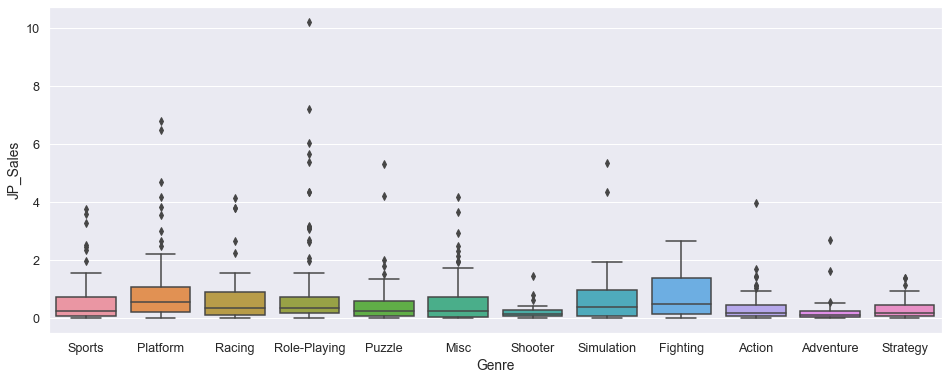

In [28]:
sns.boxplot(data=nitetendo, x='Genre', y='JP_Sales')

In [29]:
#7

In [30]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

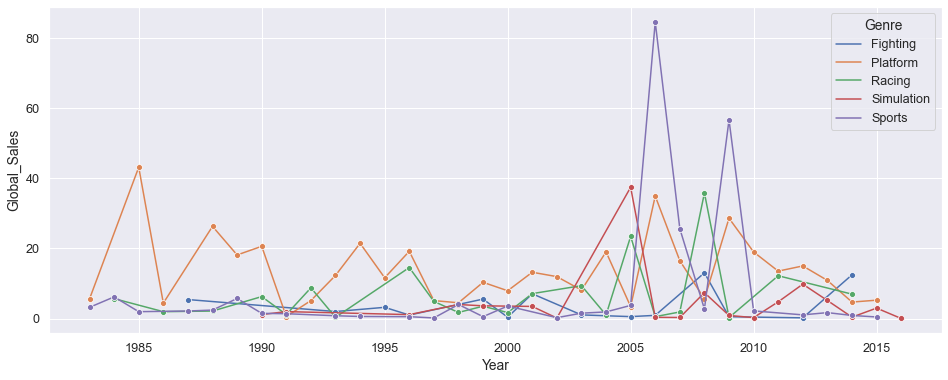

In [31]:
nitetendo_genre = (nitetendo
                   .query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")
                   .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index())

nitetendo_genre

sns.lineplot(data=nitetendo_genre, x='Year', y='Global_Sales', hue='Genre', marker='o')

In [32]:
nitetendo_genre.query("Genre == 'Sports'").max()

Genre           Sports
Year              2015
Global_Sales     84.62
dtype: object